In [2]:
# Import libraries
import moments, moments.LD
import pandas as pd, numpy as np
from collections import defaultdict
import demes, demesdraw, matplotlib.pylab as plt
import msprime as ms

import model, slice, get_LD, plot_LD

In [3]:
#! wget https://raw.githubusercontent.com/apragsdale/african-structure-paper/main/demes_models/merger_with_stem_migration.yaml

In [4]:
mws = model.load_yaml("merger_with_stem_migration.yaml")

In [5]:
def plot_comparison(LDpop1,LDpop2,labels=["Original","Size Change"]):
    rhos = np.logspace(-2, 2, 21)
    
    # plot D2
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.plot(rhos,LDpop1[:,0],label=labels[0])
    ax.plot(rhos,LDpop2[:,0],label=labels[1])
    ax.legend()
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"$\sigma_d^2$")
    ax.set_xlabel(r"$\rho$")

    # plot DZ
    ax2.plot(rhos,LDpop1[:,1],label=labels[0])
    ax2.plot(rhos,LDpop2[:,1],label=labels[1])
    ax2.legend()
    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_ylabel(r"$\sigma_{Dz}$")
    ax2.set_xlabel(r"$\rho$")

    plt.tight_layout()
    plt.show()

def plot_iicr(iirc,T): 
    plt.plot(T, iirc)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("time ago (years)",fontsize = 14)
    plt.ylabel(r"IICR",fontsize = 14);

<AxesSubplot:ylabel='time ago (years)'>

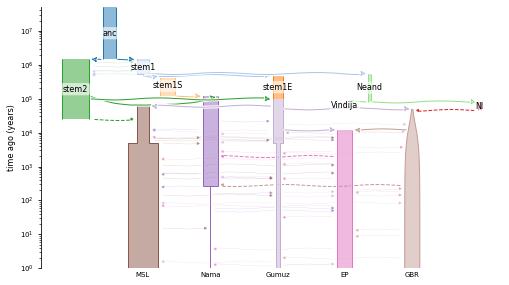

In [6]:
demesdraw.tubes(mws, log_time=True, num_lines_per_migration=3)

In [7]:
T,times_dic = slice.sample_timepoints(mws,100,10e7)

In [8]:
times_in_gen = T/29
times_in_gen[0] = 1

In [9]:
# Compute LD from present day pops in model
mws_sliced = slice.slice_timepoints(mws,time_points=[0])
mws_sliced_LD = get_LD.get_LD_from_sliced_demes(mws_sliced)

MENDE (MSL)

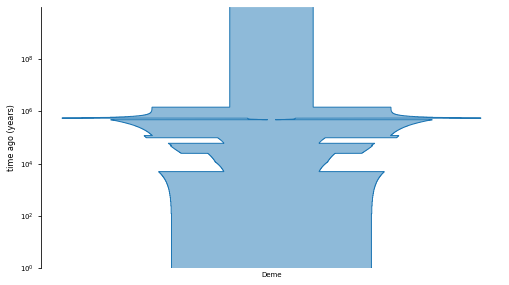

In [10]:
msl_R, msl_iicr, _ = model.get_iicr(mws,pop="MSL",T=times_in_gen)
msl_sc = model.size_change_from_iicr(msl_iicr,T,time_units="years")

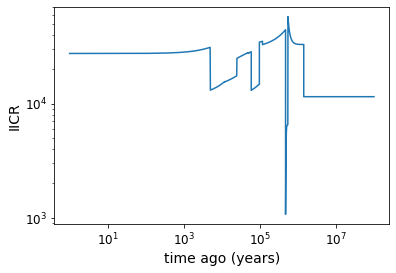

In [11]:
plot_iicr(msl_iicr,T)

In [12]:
# Actually slice
msl_sliced = slice.slice_timepoints(msl_sc,time_points=[0])
msl_sliced_LD = get_LD.get_LD_from_sliced_demes(msl_sliced)


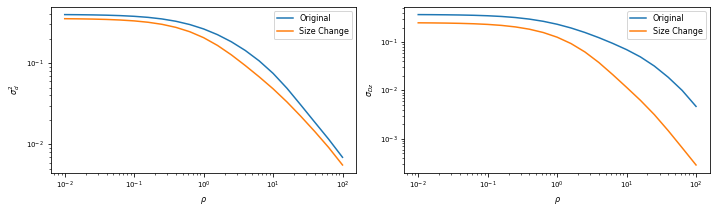

In [13]:
plot_comparison(mws_sliced_LD['MSL'][-1],msl_sliced_LD['Deme'][-1])

Nama

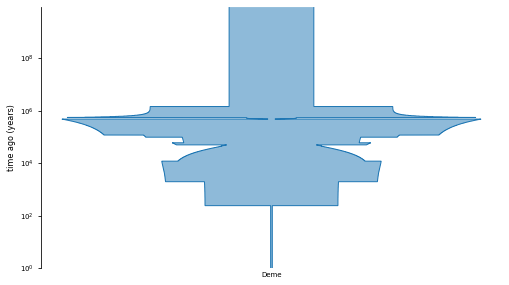

In [14]:
nama_R,nama_iicr, _ = model.get_iicr(mws,pop="Nama",T=times_in_gen)
nama_sc = model.size_change_from_iicr(nama_iicr,T,time_units="years")

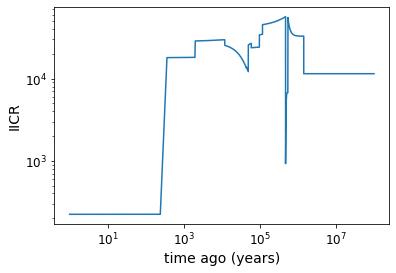

In [15]:
plot_iicr(nama_iicr,T)

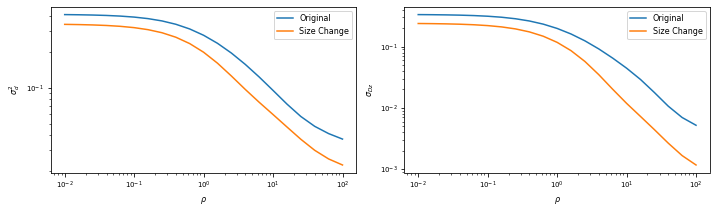

In [16]:
# Actually slice
nama_sliced = slice.slice_timepoints(nama_sc,time_points=[0])
nama_sliced_LD = get_LD.get_LD_from_sliced_demes(nama_sliced)
plot_comparison(mws_sliced_LD['Nama'][-1],nama_sliced_LD['Deme'][-1])

Gumuz

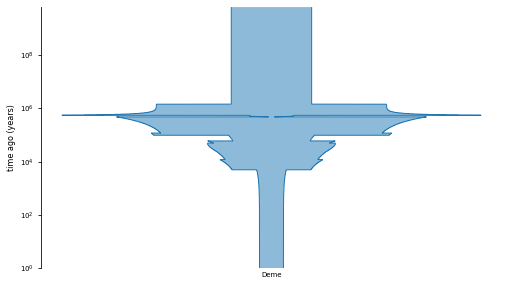

In [17]:
Gumuz_R,Gumuz_iicr, _ = model.get_iicr(mws,pop="Gumuz",T=times_in_gen)
Gumuz_sc = model.size_change_from_iicr(Gumuz_iicr,T,time_units="years")

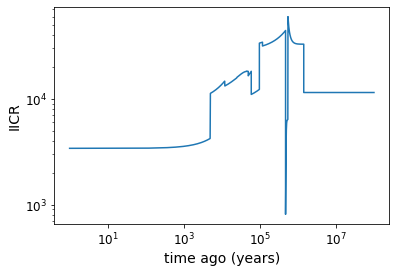

In [18]:
plot_iicr(Gumuz_iicr,T)

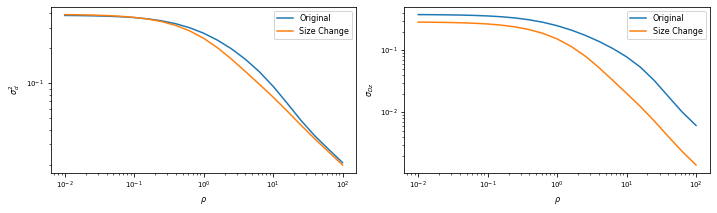

In [19]:
# Actually slice
gumuz_sliced = slice.slice_timepoints(Gumuz_sc,time_points=[0])
gumuz_sliced_LD = get_LD.get_LD_from_sliced_demes(gumuz_sliced)
plot_comparison(mws_sliced_LD['Gumuz'][-1],gumuz_sliced_LD['Deme'][-1])

EP

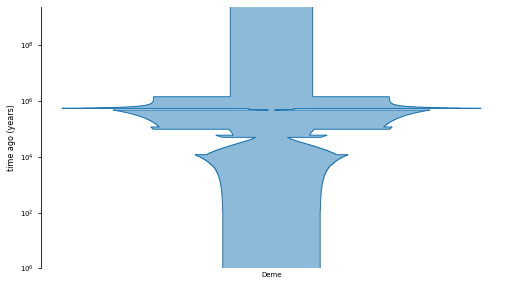

In [20]:
EP_R,EP_iicr, _ = model.get_iicr(mws,pop="EP",T=times_in_gen)
EP_sc = model.size_change_from_iicr(EP_iicr,T,time_units="years")

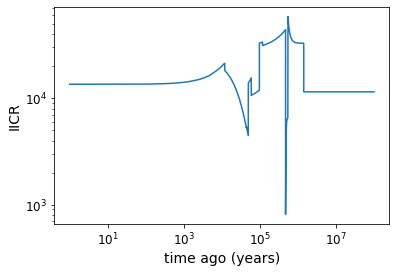

In [21]:
plot_iicr(EP_iicr,T)

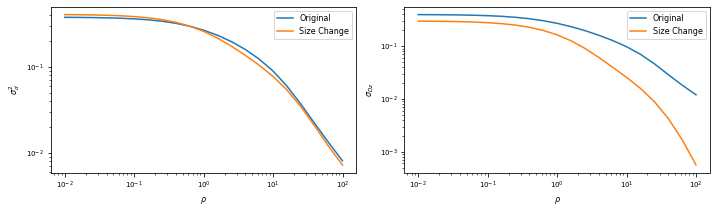

In [22]:
# Actually slice
EP_sliced = slice.slice_timepoints(EP_sc,time_points=[0])
EP_sliced_LD = get_LD.get_LD_from_sliced_demes(EP_sliced)
plot_comparison(mws_sliced_LD['EP'][-1],EP_sliced_LD['Deme'][-1])

GBR

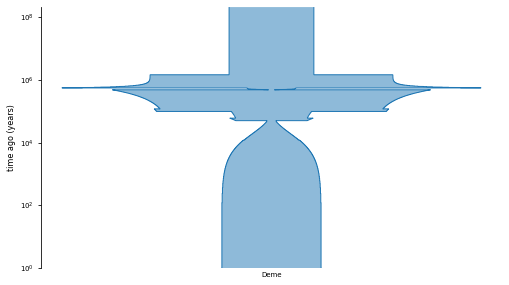

In [23]:
GBR_R,GBR_iicr, _ = model.get_iicr(mws,pop="GBR",T=times_in_gen)
GBR_sc = model.size_change_from_iicr(GBR_iicr,T,time_units="years")

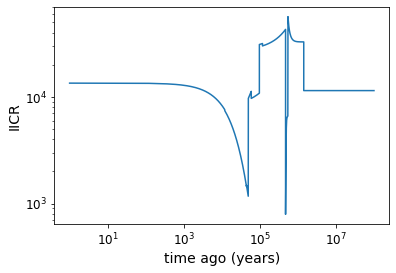

In [24]:
plot_iicr(GBR_iicr,T)

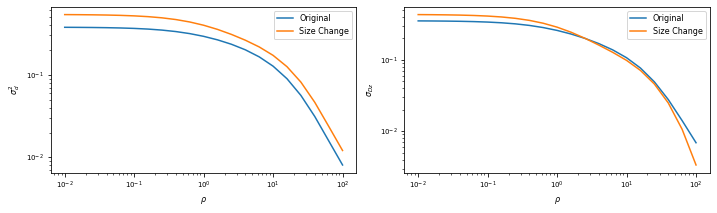

In [25]:
# Actually slice
GBR_sliced = slice.slice_timepoints(GBR_sc,time_points=[0])
GBR_sliced_LD = get_LD.get_LD_from_sliced_demes(GBR_sliced)
plot_comparison(mws_sliced_LD['GBR'][-1],GBR_sliced_LD['Deme'][-1])

Ancestral population

In [26]:
anc_sliced = slice.slice_timepoints(mws,time_points=[mws['anc'].end_time])
anc_sliced_LD = get_LD.get_LD_from_sliced_demes(anc_sliced)

In [27]:
anc_times = times_dic['anc']
anc_times_in_gen = anc_times/29
anc_times_in_gen[0] = 1

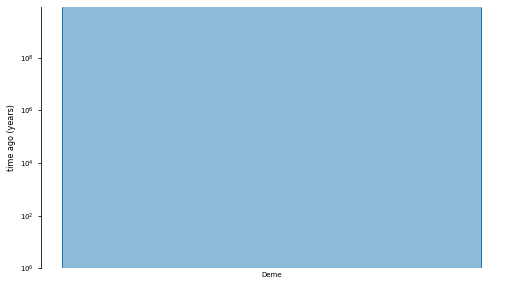

In [28]:
anc_R,anc_iicr, _ = model.get_iicr(anc_sliced[1442022],pop="anc",T=anc_times_in_gen)
anc_sc = model.size_change_from_iicr(anc_iicr,anc_times,time_units="years")

In [29]:
anc_sliced_LD

defaultdict(list,
            {'anc': [array([[4.52325114e-01, 3.61498592e-01, 1.00000000e+00],
                     [4.51036627e-01, 3.60258331e-01, 1.00000000e+00],
                     [4.49009708e-01, 3.58307738e-01, 1.00000000e+00],
                     [4.45834866e-01, 3.55253602e-01, 1.00000000e+00],
                     [4.40895385e-01, 3.50504772e-01, 1.00000000e+00],
                     [4.33290433e-01, 3.43200343e-01, 1.00000000e+00],
                     [4.21768190e-01, 3.32150324e-01, 1.00000000e+00],
                     [4.04728633e-01, 3.15849135e-01, 1.00000000e+00],
                     [3.80410912e-01, 2.92677046e-01, 1.00000000e+00],
                     [3.47410632e-01, 2.61433187e-01, 1.00000000e+00],
                     [3.05555556e-01, 2.22222222e-01, 1.00000000e+00],
                     [2.56783006e-01, 1.77322658e-01, 1.00000000e+00],
                     [2.05233687e-01, 1.31224776e-01, 1.00000000e+00],
                     [1.56033759e-01, 8.92828603e-02

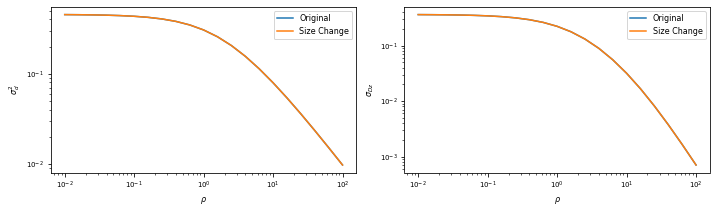

In [30]:
# Actually slice
anc_sc_sliced = slice.slice_timepoints(anc_sc,time_points=[0])
anc_sc_sliced_LD = get_LD.get_LD_from_sliced_demes(anc_sc_sliced)
plot_comparison(anc_sliced_LD['anc'][-1],anc_sc_sliced_LD['Deme'][-1])

All pops model - LD

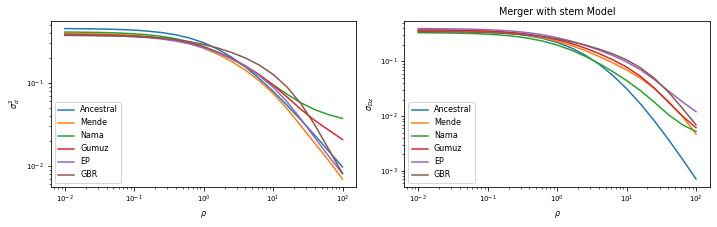

In [31]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(rhos,anc_sliced_LD['anc'][-1][:,0],label="Ancestral")
ax.plot(rhos,mws_sliced_LD['MSL'][-1][:,0],label="Mende")
ax.plot(rhos,mws_sliced_LD['Nama'][-1][:,0],label="Nama")
ax.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,0],label="Gumuz")
ax.plot(rhos,mws_sliced_LD['EP'][-1][:,0],label="EP")
ax.plot(rhos,mws_sliced_LD['GBR'][-1][:,0],label="GBR")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sliced_LD['anc'][-1][:,1],label="Ancestral")
ax2.plot(rhos,mws_sliced_LD['MSL'][-1][:,1],label="Mende")
ax2.plot(rhos,mws_sliced_LD['Nama'][-1][:,1],label="Nama")
ax2.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,1],label="Gumuz")
ax2.plot(rhos,mws_sliced_LD['EP'][-1][:,1],label="EP")
ax2.plot(rhos,mws_sliced_LD['GBR'][-1][:,1],label="GBR")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.title("Merger with stem Model")
plt.savefig("Dstats_allpops_mergerwithstem.pdf",format='pdf',transparent = False)
#plt.show()

All pops Pop size change from IICR - LD

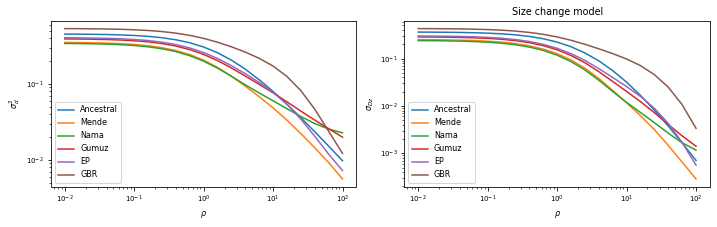

In [32]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,0],label="Ancestral")
ax.plot(rhos,msl_sliced_LD['Deme'][-1][:,0],label="Mende")
ax.plot(rhos,nama_sliced_LD['Deme'][-1][:,0],label="Nama")
ax.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,0],label="Gumuz")
ax.plot(rhos,EP_sliced_LD['Deme'][-1][:,0],label="EP")
ax.plot(rhos,GBR_sliced_LD['Deme'][-1][:,0],label="GBR")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,1],label="Ancestral")
ax2.plot(rhos,msl_sliced_LD['Deme'][-1][:,1],label="Mende")
ax2.plot(rhos,nama_sliced_LD['Deme'][-1][:,1],label="Nama")
ax2.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,1],label="Gumuz")
ax2.plot(rhos,EP_sliced_LD['Deme'][-1][:,1],label="EP")
ax2.plot(rhos,GBR_sliced_LD['Deme'][-1][:,1],label="GBR")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.title("Size change model")
plt.savefig("Dstats_allpops_sizechange.pdf",format='pdf',transparent = False)
#plt.show()

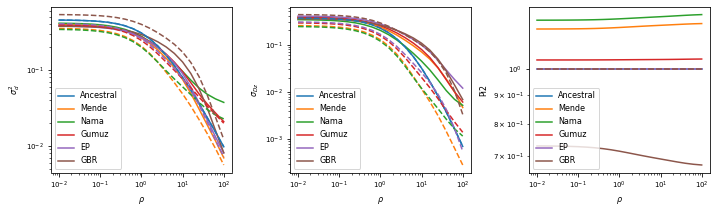

In [33]:
rhos = np.logspace(-2, 2, 21)

# plot D2
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.plot(rhos,anc_sliced_LD['anc'][-1][:,0],label="Ancestral")
ax.plot(rhos,mws_sliced_LD['MSL'][-1][:,0],label="Mende")
ax.plot(rhos,mws_sliced_LD['Nama'][-1][:,0],label="Nama")
ax.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,0],label="Gumuz")
ax.plot(rhos,mws_sliced_LD['EP'][-1][:,0],label="EP")
ax.plot(rhos,mws_sliced_LD['GBR'][-1][:,0],label="GBR")

ax.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,0],'--',color="tab:blue")
ax.plot(rhos,msl_sliced_LD['Deme'][-1][:,0],'--',color="tab:orange")
ax.plot(rhos,nama_sliced_LD['Deme'][-1][:,0],'--',color="tab:green")
ax.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,0],'--',color="tab:red")
ax.plot(rhos,EP_sliced_LD['Deme'][-1][:,0],'--',color="tab:purple")
ax.plot(rhos,GBR_sliced_LD['Deme'][-1][:,0],'--',color="tab:brown")

ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\sigma_d^2$")
ax.set_xlabel(r"$\rho$")

# plot DZ
ax2.plot(rhos,anc_sliced_LD['anc'][-1][:,1],label="Ancestral")
ax2.plot(rhos,mws_sliced_LD['MSL'][-1][:,1],label="Mende")
ax2.plot(rhos,mws_sliced_LD['Nama'][-1][:,1],label="Nama")
ax2.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,1],label="Gumuz")
ax2.plot(rhos,mws_sliced_LD['EP'][-1][:,1],label="EP")
ax2.plot(rhos,mws_sliced_LD['GBR'][-1][:,1],label="GBR")

ax2.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,1],'--',color="tab:blue")
ax2.plot(rhos,msl_sliced_LD['Deme'][-1][:,1],'--',color="tab:orange")
ax2.plot(rhos,nama_sliced_LD['Deme'][-1][:,1],'--',color="tab:green")
ax2.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,1],'--',color="tab:red")
ax2.plot(rhos,EP_sliced_LD['Deme'][-1][:,1],'--',color="tab:purple")
ax2.plot(rhos,GBR_sliced_LD['Deme'][-1][:,1],'--',color="tab:brown")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_ylabel(r"$\sigma_{Dz}$")
ax2.set_xlabel(r"$\rho$")

# plot Pi2
ax3.plot(rhos,anc_sliced_LD['anc'][-1][:,2],label="Ancestral")
ax3.plot(rhos,mws_sliced_LD['MSL'][-1][:,2],label="Mende")
ax3.plot(rhos,mws_sliced_LD['Nama'][-1][:,2],label="Nama")
ax3.plot(rhos,mws_sliced_LD['Gumuz'][-1][:,2],label="Gumuz")
ax3.plot(rhos,mws_sliced_LD['EP'][-1][:,2],label="EP")
ax3.plot(rhos,mws_sliced_LD['GBR'][-1][:,2],label="GBR")

ax3.plot(rhos,anc_sc_sliced_LD['Deme'][-1][:,2],'--',color="tab:blue")
ax3.plot(rhos,msl_sliced_LD['Deme'][-1][:,2],'--',color="tab:orange")
ax3.plot(rhos,nama_sliced_LD['Deme'][-1][:,2],'--',color="tab:green")
ax3.plot(rhos,gumuz_sliced_LD['Deme'][-1][:,2],'--',color="tab:red")
ax3.plot(rhos,EP_sliced_LD['Deme'][-1][:,2],'--',color="tab:purple")
ax3.plot(rhos,GBR_sliced_LD['Deme'][-1][:,2],'--',color="tab:brown")

ax3.legend()
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_ylabel(r"Pi2")
ax3.set_xlabel(r"$\rho$")

plt.tight_layout()
plt.savefig("Dstats_allpops.pdf",format='pdf',transparent = False)
#plt.show()

All pops model - IIRC

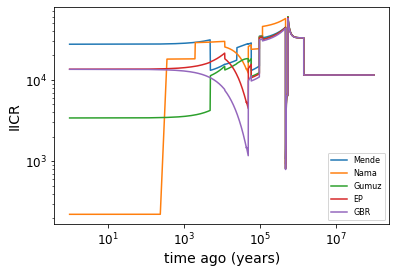

In [34]:
plt.plot(T, msl_iicr,label="Mende") #Mende
plt.plot(T, nama_iicr, label="Nama") #Nama
plt.plot(T, Gumuz_iicr, label="Gumuz") #Gumuz
plt.plot(T, EP_iicr,label="EP") #EP
plt.plot(T, GBR_iicr,label="GBR") #GBR
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlabel("time ago (years)",fontsize = 14)
plt.ylabel(r"IICR",fontsize = 14);

------

The mende had recent migration with the GBR